### Library Imports

In [42]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import statistics as stat
from scipy.stats import iqr

### Function Definitions

In [43]:
# THIS FUNCTION READS THE RAW DATA FILE AND PUTS IT IN A DATAFRAME 
def reader(filename):
    global df
    df = pd.read_csv(filename)

# THIS FUNCTIONS PLOTS THE DATA (SENSOR VALUE VS TIME)    
def plotter(df):
    plt.figure(figsize=(15,3))
    plt.title("RAW Data")
    plt.xlabel("Time (millisecond)") 
    plt.ylabel("Sensor Value") 
    plt.plot(df["time_data"], df["tap_data"])

# THIS FUNCTIONS FILTERS THE DATA BASED ON A THRESHOLD
# IT ALSO MAKES THE SENSOR VALUE BINARY FOR EASIER CALCULATION 
def filter(threshold):

    temp = df["tap_data"]
    ll = []
    for data in temp:
        if data >threshold:
            ll.append(1)
        else :
            ll.append(0)

    df["binary_tap_data"] = ll

# THIS FUNCTION GETS RID OF THE LEADING AND TRAILING 0 THEN PLOTS IT
def trimmer():
    global tap
    global time
    tap = df["binary_tap_data"]
    time = df["time_data"]

    first_one_index = next(i for i, x in enumerate(tap) if x == 1)

    last_one_index = len(tap) - 1 - next(i for i, x in enumerate(reversed(tap)) if x == 1)

    # Slice both lists to remove leading and trailing zeros
    tap = tap[first_one_index:last_one_index+1]
    time = time[first_one_index:last_one_index+1]

    plt.figure(figsize=(15,3)) 
    plt.title("Filtered Data")
    plt.xlabel("Time (millisecond)") 
    plt.ylabel("Toouch Sense") 
    plt.plot(time, tap)


# THIS FUNCTION WORKS ON THE FILTERED DATA TO GET THE AT20 SCORES
def at20_estimator():
    at_20 = []

    flag = 0

    for tt,tm in zip(tap,time):
        if tt == 1 and flag == 0:
            start_time = tm
            flag = 1
        if tt == 1 and flag == 1:
            end_time = tm
        if tt == 0 and flag == 1:
            flag = 0
            end_time = tm
            at_20.append(end_time-start_time)
        if tt == 0 and flag ==0:
            continue
    
    return at_20

# THIS FUNCTION WORKS ON THE FILTERED DATA TO GET THE IS20 SCORES
def is20_estimator():
    is_20 = []

    inverted_tap = [1 if x == 0 else 0 for x in tap]
    flag = 0

    for tt,tm in zip(inverted_tap,time):
        if tt == 1 and flag == 0:
            start_time = tm
            flag = 1
        if tt == 1 and flag == 1:
            end_time = tm
        if tt == 0 and flag == 1:
            flag = 0
            end_time = tm
            is_20.append(end_time-start_time)
        if tt == 0 and flag ==0:
            continue
        
    return is_20

### Seeing the raw data if there is any spikes at the beginning 

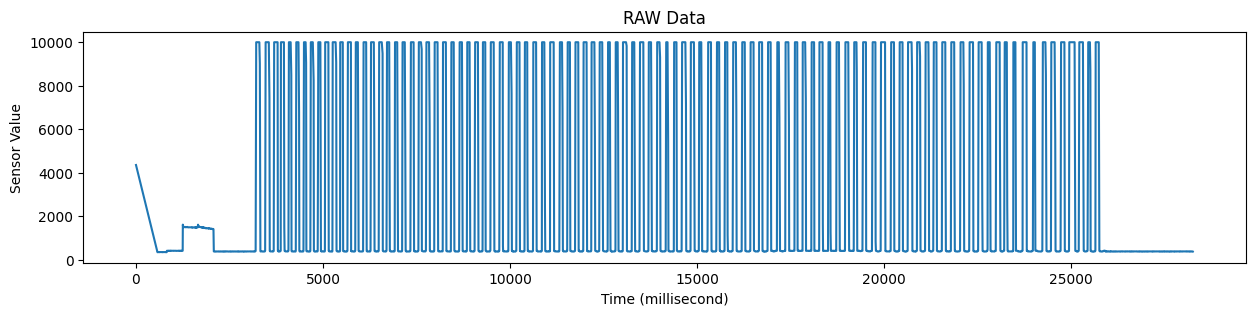

In [169]:
path = "Raw data/"
file = path + "s30_index_l.csv"
reader(file)
plotter(df)

### If there are spkies at the beginning, dropping first few rows and updating the dataframe 

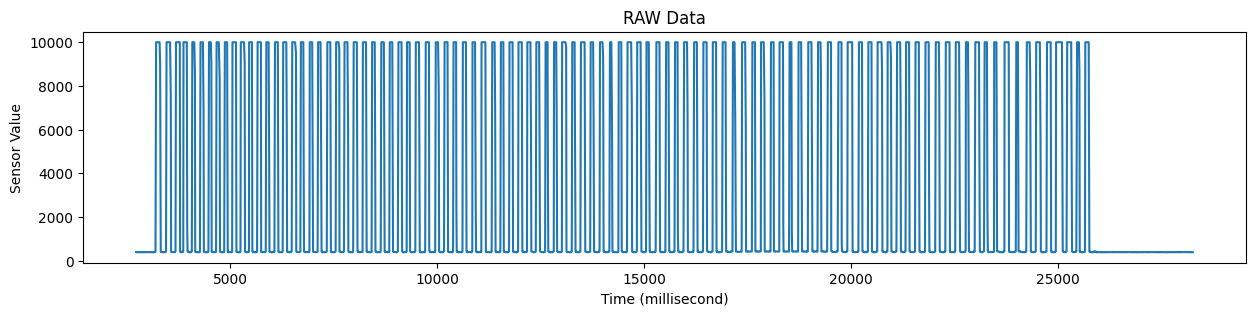

In [170]:
df = df.drop(index=df.index[:350])
df.reset_index(inplace=True)
plotter(df)

### Trimming and filtering the dataframe
The filter threshold value is selected by visually insepecting the previous plot 

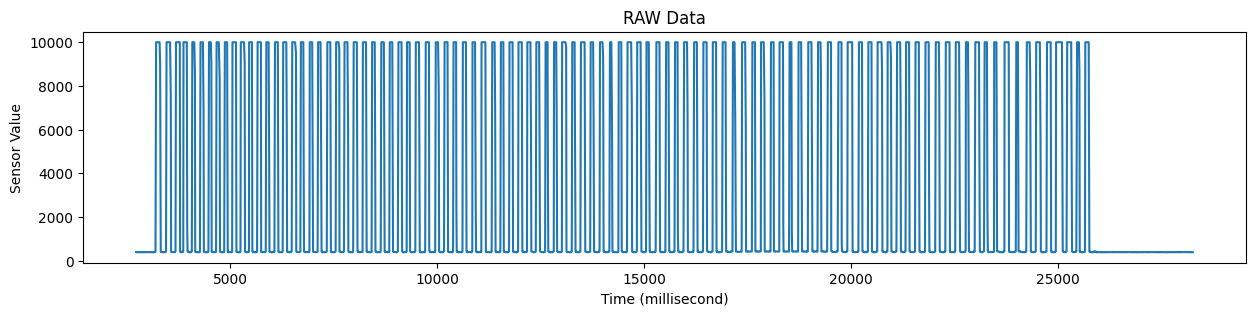

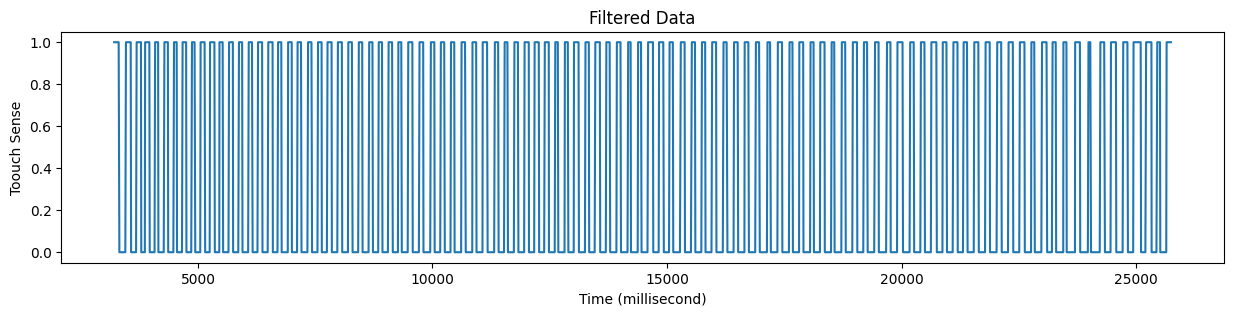

In [171]:
filter(1000)
plotter(df)
trimmer()

### Getting the AT20 and IS20 data from the filtered data

In [173]:
at_20 = at20_estimator()
print(f"AT20 length = {len(at_20)}")

is_20 = is20_estimator()
print(f"IS20 length = {len(at_20)}")

AT20 length = 100
IS20 length = 100


In [174]:
data = {'at20_s30_l': at_20, 'is20_30_l': is_20}
subject_data = pd.DataFrame(data)
# subject_data
subject_data.to_csv('s30_l.csv', index=False)

In [175]:
new_df = pd.read_csv('s30_l.csv')
new_df

,at20_s30_l,is20_30_l
0,112,140
1,110,118
2,99,82
3,98,115
4,70,128
...,...,...
95,113,148
96,100,120
97,160,108
98,117,121


In [50]:
new_df["at20_s11_l"].mean()

np.float64(56.57553956834533)